<a href="https://colab.research.google.com/github/Shinu87/MACHINE_LEARNING/blob/main/DiamondPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [364]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [365]:
df = pd.read_csv('/content/drive/MyDrive/EDA/Diamonds.csv')
df.head()

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75


In [366]:
df.tail()

,carat,cut,color,clarity,price,x,y,z
53935,0.72,Ideal,D,SI1,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,2757,5.83,5.87,3.64


In [367]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
price        int64
x          float64
y          float64
z          float64
dtype: object

In [368]:
df = df.rename(columns={'x': 'length','y':'depth','z':'width'})
df.head()

,carat,cut,color,clarity,price,length,depth,width
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75


In [369]:
df.shape

(53940, 8)

In [370]:
duplicate = df[df.duplicated()]
duplicate.count()

carat      296
cut        296
color      296
clarity    296
price      296
length     296
depth      296
width      296
dtype: int64

In [371]:
df = df.drop_duplicates()
df.shape

(53644, 8)

In [372]:
print(df.isnull().sum())

carat      0
cut        0
color      0
clarity    0
price      0
length     0
depth      0
width      0
dtype: int64


<Axes: xlabel='carat'>

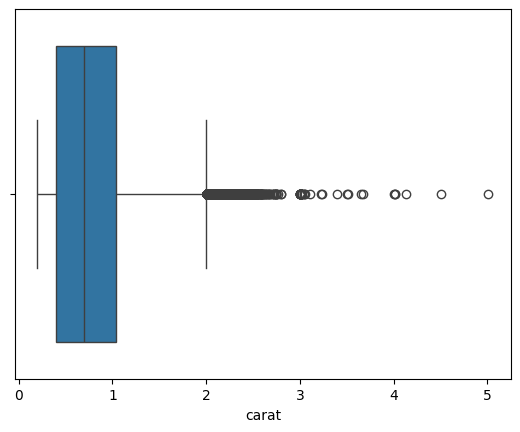

In [373]:
sns.boxplot(x=df['carat'])

<Axes: xlabel='price'>

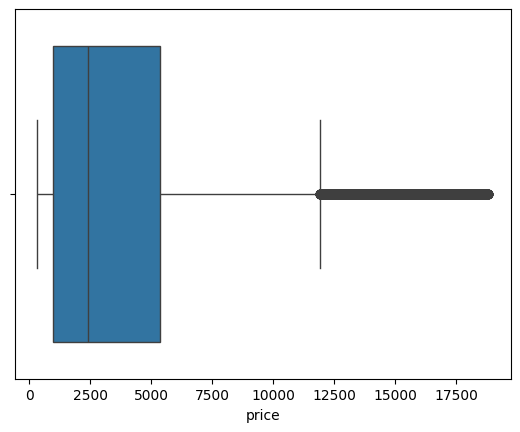

In [374]:
sns.boxplot(x=df['price'])

In [375]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

carat        0.64
price     4383.25
length       1.82
depth        1.81
width        1.13
dtype: float64


In [376]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for col in numeric_df:
    df[col] = np.where((df[col] < lower_bound[col]) | (df[col] > upper_bound[col]), np.nan, df[col])
df.dropna(inplace=True)

In [377]:
df.shape

(49905, 8)

In [378]:
print(df.isnull().sum())

carat      0
cut        0
color      0
clarity    0
price      0
length     0
depth      0
width      0
dtype: int64


In [379]:
df = df.dropna()
df.count()

carat      49905
cut        49905
color      49905
clarity    49905
price      49905
length     49905
depth      49905
width      49905
dtype: int64

In [380]:
df.shape

(49905, 8)

<Axes: >

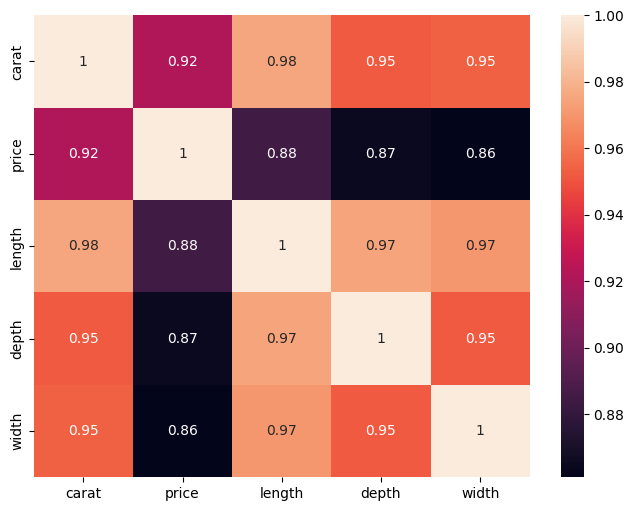

In [381]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(),annot=True)

In [382]:
x = numeric_df.drop('price',axis=1)
y = numeric_df['price']

In [383]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# ***LINEAR REGRESSION***

In [384]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [385]:
y_pred = model.predict(x_test)

In [386]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2353746.911043262
R-squared: 0.8519177810151614


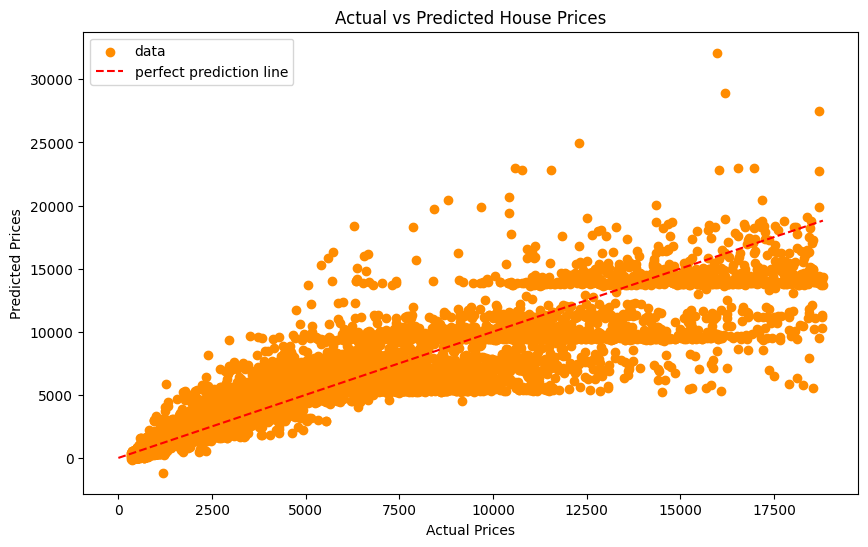

In [387]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='darkorange', label='data')
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--', label='perfect prediction line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()


# ***SVR***

In [388]:
from sklearn.svm import SVR
svr = SVR(kernel='poly')
svr.fit(x_train,y_train)

SVR(kernel='poly')

In [389]:
y_pred = svr.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2493556.819333043
R-squared: 0.8431218644455072


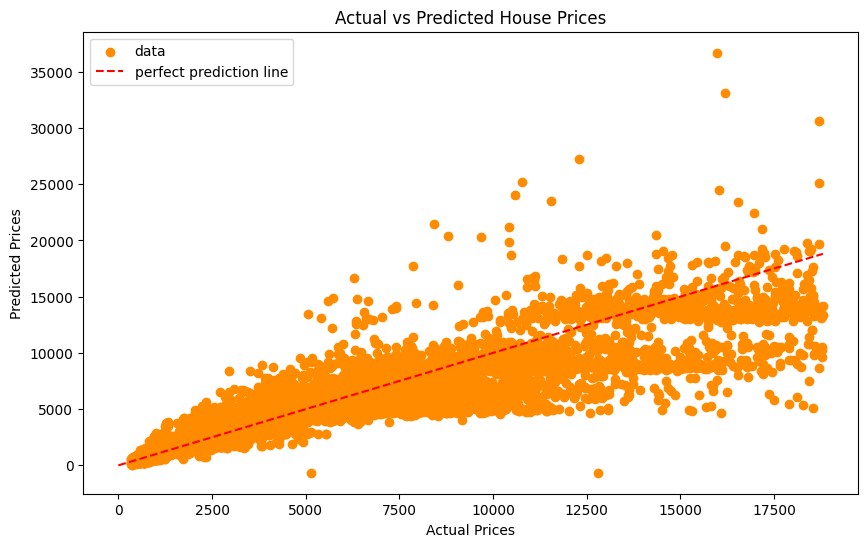

In [390]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='darkorange', label='data')
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--', label='perfect prediction line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()